In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Dhrumil\Desktop\Data Science Bootcamp\Mall_Customers.csv")

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# choose the features: 
#(in unsup.learning don't need of indepandant and depandant features)
x = df.iloc[:,[2,3]].values

In [5]:
x

array([[ 19,  15],
       [ 21,  15],
       [ 20,  16],
       [ 23,  16],
       [ 31,  17],
       [ 22,  17],
       [ 35,  18],
       [ 23,  18],
       [ 64,  19],
       [ 30,  19],
       [ 67,  19],
       [ 35,  19],
       [ 58,  20],
       [ 24,  20],
       [ 37,  20],
       [ 22,  20],
       [ 35,  21],
       [ 20,  21],
       [ 52,  23],
       [ 35,  23],
       [ 35,  24],
       [ 25,  24],
       [ 46,  25],
       [ 31,  25],
       [ 54,  28],
       [ 29,  28],
       [ 45,  28],
       [ 35,  28],
       [ 40,  29],
       [ 23,  29],
       [ 60,  30],
       [ 21,  30],
       [ 53,  33],
       [ 18,  33],
       [ 49,  33],
       [ 21,  33],
       [ 42,  34],
       [ 30,  34],
       [ 36,  37],
       [ 20,  37],
       [ 65,  38],
       [ 24,  38],
       [ 48,  39],
       [ 31,  39],
       [ 49,  39],
       [ 24,  39],
       [ 50,  40],
       [ 27,  40],
       [ 29,  40],
       [ 31,  40],
       [ 49,  42],
       [ 33,  42],
       [ 31,

# K- Means Clustering :

C:\Users\Dhrumil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dhrumil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dhrumil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dhrumil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

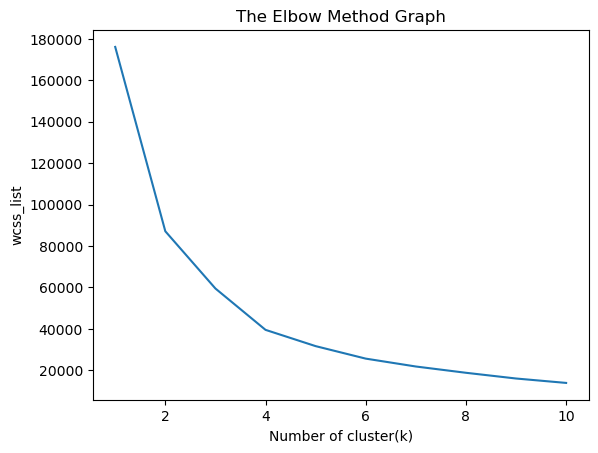

In [6]:
# find the cluster using elbow method :
from sklearn.cluster import KMeans
wcss_list = []   # intializing list for the values of WCSS

#Using for loop for the iteration from 1 to 10 :

for i in range(1,11):
    kmeans = KMeans(n_clusters = i , init= 'k-means++' , random_state = 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1,11),wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of cluster(k)')
plt.ylabel('wcss_list')
plt.show()

In [7]:
# trainig the k - means model on a dataset :
# calling  The k-Means model :
kmeans = KMeans(n_clusters = 5 , init='k-means++',random_state = 42)
y_predict = kmeans.fit_predict(x)

C:\Users\Dhrumil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dhrumil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Visualization part :

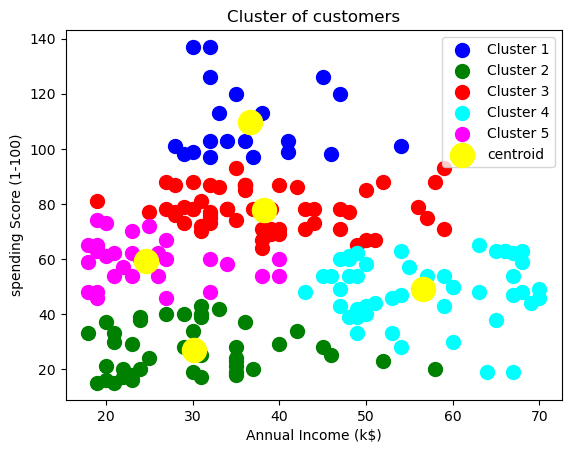

In [10]:
#visualizing the clusters :

plt.scatter(x[y_predict == 0,0] , x[y_predict == 0,1] , s = 100 , c = 'blue' ,label = 'Cluster 1')
plt.scatter(x[y_predict == 1,0] , x[y_predict == 1,1] , s = 100 , c = 'green' ,label = 'Cluster 2') 
plt.scatter(x[y_predict == 2,0] , x[y_predict == 2,1] , s = 100 , c = 'red' ,label = 'Cluster 3') 
plt.scatter(x[y_predict == 3,0] , x[y_predict == 3,1] , s = 100 , c = 'cyan' ,label = 'Cluster 4') 
plt.scatter(x[y_predict == 4,0] , x[y_predict == 4,1] , s = 100 , c = 'magenta' ,label = 'Cluster 5') 
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 300 ,c = 'yellow' , label = 'centroid')
plt.title('Cluster of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('spending Score (1-100)')
plt.legend()
plt.show()